In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import time
from matplotlib import rcParams
import cartopy
%matplotlib inline
rcParams['figure.figsize'] = (15,10)

In [3]:
prime_prod_df = pd.read_csv("https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1pp8day.csv?productivity%5B(2004-02-22T00:00:00Z):1:(2012-02-22T00:00:00Z)%5D%5B(0.0):1:(0.0)%5D%5B(52.35416):1:(52.02083)%5D%5B(-175.7708):1:(-175.2708)%5D,nobs%5B(2004-02-22T00:00:00Z):1:(2012-02-22T00:00:00Z)%5D%5B(0.0):1:(0.0)%5D%5B(52.35416):1:(52.02083)%5D%5B(-175.7708):1:(-175.2708)%5D") 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
chl_df = pd.read_csv("https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chla8day_R202SQ.csv?chlor_a%5B(2004-02-22T00:00:00Z):1:(2012-02-22T00:00:00Z)%5D%5B(52.35416):1:(52.02083)%5D%5B(-175.7708):1:(-175.2708)%5D")

In [5]:
prime_prod_df[1:]

,time,altitude,latitude,longitude,productivity,nobs
1,2004-02-22T00:00:00Z,0.0,52.35417938232422,-175.7707977294922,285.26434,1
2,2004-02-22T00:00:00Z,0.0,52.35417938232422,-175.7292022705078,288.27325,1
3,2004-02-22T00:00:00Z,0.0,52.35417938232422,-175.6875,288.27325,1
4,2004-02-22T00:00:00Z,0.0,52.35417938232422,-175.6457977294922,282.55396,1
5,2004-02-22T00:00:00Z,0.0,52.35417938232422,-175.6042022705078,282.55396,1
...,...,...,...,...,...,...
341987,2012-02-22T00:00:00Z,0.0,52.02084,-175.4375,NaN,0
341988,2012-02-22T00:00:00Z,0.0,52.02084,-175.395798,NaN,0
341989,2012-02-22T00:00:00Z,0.0,52.02084,-175.354202,NaN,0
341990,2012-02-22T00:00:00Z,0.0,52.02084,-175.3125,NaN,0


In [6]:
type(prime_prod_df.columns)

pandas.core.indexes.base.Index

In [7]:
print(f"NaN values are {(prime_prod_df['productivity'][1:].isna().sum()/len(prime_prod_df[1:]))*100} % of Total productivity values.")

NaN values are 96.22738610080383 % of Total productivity values.


In [8]:
def stamptodate(x):
    return time.mktime(dt.strptime(x[:10], "%Y-%m-%d").timetuple())

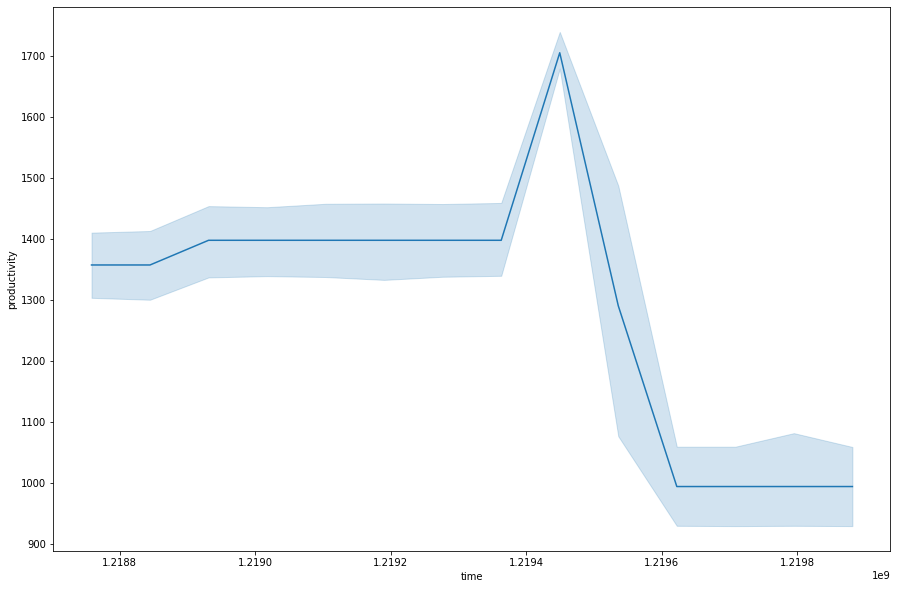

In [9]:
ax = sns.lineplot(x = prime_prod_df.loc[1:].time[prime_prod_df.loc[1:].time.apply(stamptodate).between(1218067200.0-20*86400, 1218067200.0+21*86400)].apply(stamptodate),
                  y = prime_prod_df.loc[1:]["productivity"].astype(float))
ax.set_figsize = (15,10)

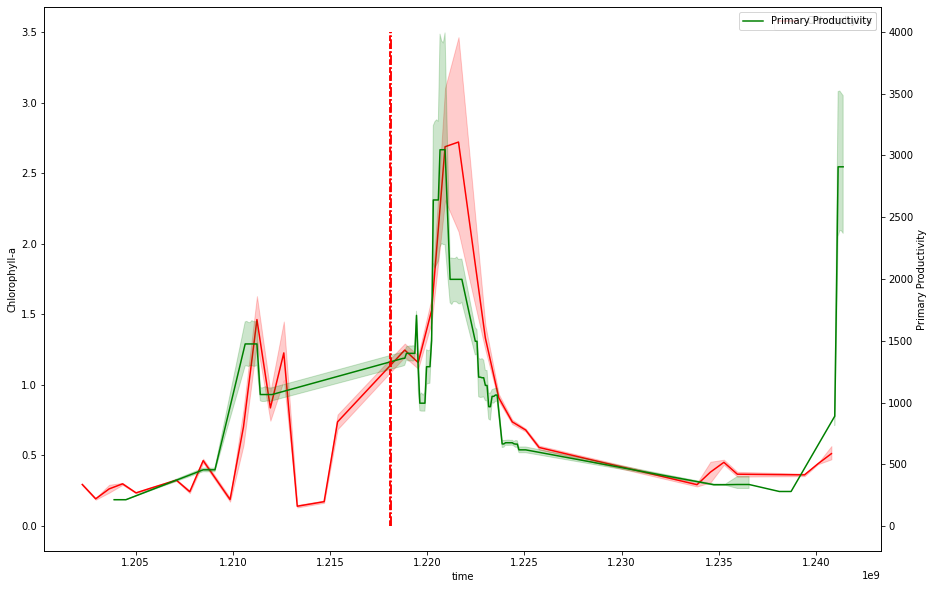

In [10]:
fig, ax1 = plt.subplots()
ax1 = sns.lineplot(x = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270 *86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
             y = chl_df.loc[1:][chl_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].chlor_a.astype(float),
            color='red',label='Chlorophyll-a')
plt.plot([stamptodate("2008-08-07")]*2,[0,3.5], color="red", linestyle="--")
plt.plot([stamptodate("2008-08-08")]*2,[0,3.5], color="red", linestyle="-.")
ax1.set_ylabel("Chlorophyll-a")

# Creating an instantaneous plot with x axis as common
ax2 = ax1.twinx()

ax2 = sns.lineplot(x = prime_prod_df.loc[1:][prime_prod_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270 *86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
             y = prime_prod_df.loc[1:][prime_prod_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].productivity.astype(float),
            color='green',label='Primary Productivity')
ax2.set_ylabel("Primary Productivity")
plt.plot([stamptodate("2008-08-07")]*2,[0,4000], color="red", linestyle="--")
plt.plot([stamptodate("2008-08-08")]*2,[0,4000], color="red", linestyle="-.")
plt.xticks(rotation=60);
plt.legend()

### It has been clearly observed that the peaks of two plots almost coincide after the Volcanic Eruption (red line). This shows that a **phytoplankton boom** was happened which resulted in significant increase in Primary Productivity. 
### Since, the primary productivity is the process of synthesis of food by microbial life using **Inorganic Products**.